In [3]:
import os
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [5]:
dataset_dir = 'D:\\Datasets\\Chessman-image-dataset'


In [4]:
# Define the ImageDataGenerator for preprocessing and data augmentation
datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, validation_split=0.2)


In [5]:
# Create a flow from the directory for both training and testing
train_generator = datagen.flow_from_directory(
    "D:\\Datasets\\Chessman-image-dataset\\Chess",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # use 'categorical' for multiple classes
    subset='training',
    seed=100,
    shuffle=True 
)

Found 442 images belonging to 6 classes.


In [6]:
test_generator = datagen.flow_from_directory(
    "D:\\Datasets\\Chessman-image-dataset\\Chess",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 109 images belonging to 6 classes.


In [7]:
# Get the test labels
test_labels = test_generator.labels
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [10]:
# Assuming you have class labels
class_labels = ['bishop', 'king', 'knight', 'pawn', 'queen', 'rook']

# Create empty lists to store data
data = {'Image': [], 'Actual Class': []}

# Iterate through batches in the test generator
for i in range(len(test_generator)):
    # Get the batch data and labels
    batch_data, batch_labels = test_generator[i]

    # Iterate through instances in the batch
    for j in range(len(batch_data)):
        # Get the actual class index
        actual_class_index = np.argmax(batch_labels[j])

        # Get the actual class label
        actual_class_label = class_labels[actual_class_index]

        # Append data to the lists
        data['Image'].append(f'Image_{i * len(batch_data) + j + 1}')  # Assuming a naming convention for images
        data['Actual Class'].append(actual_class_label)

# Create a DataFrame
df_test = pd.DataFrame(data)

# Display DataFrame
print(df_test)

NameError: name 'np' is not defined

In [12]:
# Load the VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [11]:
# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False


NameError: name 'base_model' is not defined

In [13]:
# Create a new model by adding your own fully connected layers on top of the VGG16 base
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))


In [21]:
# Compile the model
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Print model summary
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 21139014 (80.64 MB)
Trainable params: 6424326 (24.51 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________
None


In [13]:
# Train the model
history = model.fit(train_generator, epochs=15, validation_data=test_generator)


Epoch 1/15
14/14 [==============================] - 253s 18s/step - loss: 0.3539 - accuracy: 0.8756 - val_loss: 0.4023 - val_accuracy: 0.8440
Epoch 2/15
14/14 [==============================] - 242s 16s/step - loss: 0.3245 - accuracy: 0.8982 - val_loss: 0.3435 - val_accuracy: 0.8440
Epoch 3/15
14/14 [==============================] - 198s 14s/step - loss: 0.3512 - accuracy: 0.8688 - val_loss: 0.3649 - val_accuracy: 0.8349
Epoch 4/15
14/14 [==============================] - 198s 14s/step - loss: 0.2843 - accuracy: 0.9095 - val_loss: 0.2729 - val_accuracy: 0.9083
Epoch 5/15
14/14 [==============================] - 196s 14s/step - loss: 0.2834 - accuracy: 0.9050 - val_loss: 0.4351 - val_accuracy: 0.8349
Epoch 6/15
14/14 [==============================] - 195s 14s/step - loss: 0.2154 - accuracy: 0.9344 - val_loss: 0.3168 - val_accuracy: 0.8807
Epoch 7/15
14/14 [==============================] - 198s 14s/step - loss: 0.2494 - accuracy: 0.9186 - val_loss: 0.2805 - val_accuracy: 0.8899
Epoch 

In [14]:
model.evaluate(test_generator)


4/4 [==============================] - 40s 9s/step - loss: 0.2751 - accuracy: 0.8899


[0.27513495087623596, 0.8899082541465759]

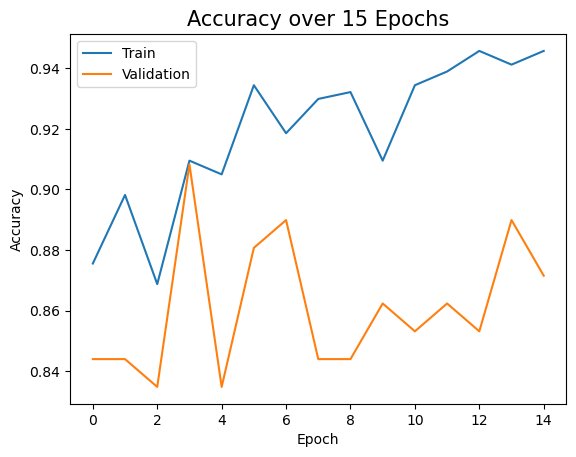

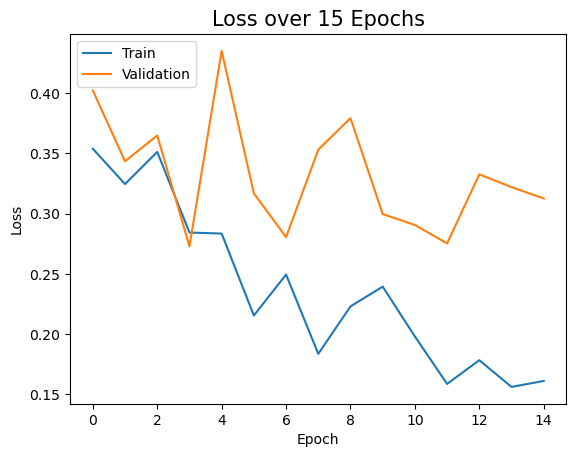

In [16]:
import matplotlib.pyplot as plt

def plot_acc_loss(history, epochs):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss over ' + str(epochs) + ' Epochs', size=15)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

plot_acc_loss(history, 15)

In [1]:
model.save('chess_find.keras')

NameError: name 'model' is not defined

In [8]:
from tensorflow.keras.models import load_model

loaded_model = load_model('chess_find.keras')

1/1 [==============================] - 2s 2s/step


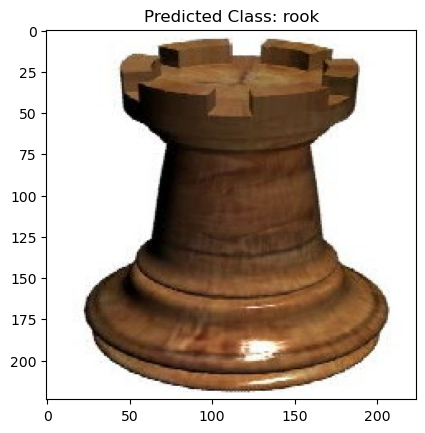

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
loaded_model = tf.keras.models.load_model('chess_find.keras')

# Path to the image you want to predict
image_path = r'D:\Datasets\Chessman-image-dataset\Chess\Rook\00000019.jpg'


# Load and preprocess the image
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize the pixel values

# Make predictions
predictions = loaded_model.predict(img_array)

# Get the predicted class label
class_labels = ['bishop', 'king', 'knight', 'pawn', 'queen', 'rook']  # Make sure the order matches your training data
predicted_class_index = np.argmax(predictions)
predicted_class = class_labels[predicted_class_index]

# Display the image and predicted class
import matplotlib.pyplot as plt

plt.imshow(img)
plt.title(f'Predicted Class: {predicted_class}')
plt.show()


In [17]:
predictions = loaded_model.predict(test_generator)


4/4 [==============================] - 53s 9s/step


In [20]:
predictions

array([[1.95144163e-03, 1.24917328e-02, 1.74512272e-04, 1.52319402e-03,
        9.82001483e-01, 1.85767526e-03],
       [9.98949945e-01, 3.95600182e-06, 8.86865291e-06, 1.02802133e-03,
        7.38026756e-06, 1.88061460e-06],
       [7.34604955e-01, 1.71438269e-02, 4.99189366e-04, 3.73678915e-02,
        2.10304588e-01, 7.95821252e-05],
       [3.70127091e-04, 3.86873692e-01, 1.63900240e-05, 5.29692916e-04,
        6.06339335e-01, 5.87073108e-03],
       [8.55646431e-06, 3.16079074e-08, 2.12795559e-08, 9.99977827e-01,
        4.13310026e-08, 1.34905740e-05],
       [3.11411452e-04, 7.23640383e-08, 9.99630570e-01, 3.53321739e-05,
        1.91835625e-06, 2.07646117e-05],
       [1.28671399e-03, 1.30895758e-04, 2.24957577e-04, 9.72198725e-01,
        4.85204015e-04, 2.56735608e-02],
       [5.52996789e-05, 2.29551262e-07, 9.99815404e-01, 1.23150618e-04,
        1.93611595e-06, 4.01852185e-06],
       [3.07722706e-02, 3.06867405e-05, 3.55938822e-03, 9.61741805e-01,
        3.82502284e-03, 

In [2]:
# Get predictions on the test data
predictions = loaded_model.predict(test_generator)

# Get the predicted class indices
predicted_class_indices = np.argmax(predictions)

# Map indices to class labels
class_labels = ['bishop', 'king', 'knight', 'pawn', 'queen', 'rook']
predicted_class_labels = [class_labels[index] for index in predicted_class_indices]

# Get the actual class indices
actual_class_indices = np.argmax(test_labels, axis=1)

# Map indices to class labels
actual_class_labels = [class_labels[index] for index in actual_class_indices]

# Create a DataFrame
df_results = pd.DataFrame({'Actual Class': actual_class_labels, 'Predicted Class': predicted_class_labels})

# Display DataFrame
print(df_results)

NameError: name 'loaded_model' is not defined

In [28]:
class_labels = ['bishop', 'king', 'knight', 'pawn', 'queen', 'rook']
predicted_class_index = np.argmax(predictions)



In [31]:
import pandas as pd
class_labels = ['bishop', 'king', 'knight', 'pawn', 'queen', 'rook']


# Get the predicted class index for the first instance in the batch
predicted_class_index = np.argmax(predictions[0])

# Get the actual class index for the first instance in the batch
actual_class_index = np.argmax(test_generator.labels[0])

# Map indices to class labels
actual_class_label = class_labels[actual_class_index]
predicted_class_label = class_labels[predicted_class_index]

# Create a DataFrame
df = pd.DataFrame({'Actual Class': [actual_class_label], 'Predicted Class': [predicted_class_label]})

# Display DataFrame
print(df)

  Actual Class Predicted Class
0       bishop           queen


In [27]:
predicted_probabilities = np.array([[1.95144163e-03, 1.24917328e-02, 1.74512272e-04, 1.52319402e-03, 9.82001483e-01, 1.85767526e-03]])
np.argmax(predicted_probabilities)

4

In [26]:
# Map indices to class labels
actual_class_label = class_labels[actual_class_index]
predicted_class_label = class_labels[predicted_class_index]

TypeError: list indices must be integers or slices, not list

In [18]:
class_labels = ['bishop', 'king', 'knight', 'pawn', 'queen', 'rook']
predicted_classes = [class_labels[np.argmax(prediction)] for prediction in predictions]
actual_classes = [class_labels[np.argmax(label)] for label in test_labels]


NameError: name 'test_labels' is not defined

In [24]:
import pandas as pd
test_generator.reset()
ytesthat = loaded_model.predict(test_generator)#`Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
df = pd.DataFrame({
    'filename':test_generator.filenames,
    'predict':ytesthat[:,0],
    'y':test_generator.classes
})

4/4 [==============================] - 46s 11s/step


In [25]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)
df.tail(10)

,filename,predict,y,y_pred
99,Rook\00000015.jpg,0.00000,5,0
100,Rook\00000016.jpg,0.02252,5,0
101,Rook\00000017.jpg,0.00000,5,0
102,Rook\00000018.jpg,0.02849,5,0
103,Rook\00000019.jpg,0.05677,5,0
104,Rook\00000020.jpg,0.01847,5,0
105,Rook\00000021.jpg,0.01858,5,0
106,Rook\00000022.jpg,0.99979,5,1
107,Rook\00000024.jpg,0.03656,5,0
108,Rook\00000025.jpeg,0.00074,5,0


In [ ]:
import pandas as pd

# Reset the test generator
test_generator.reset()

# Use Model.predict to get predictions for the test set
y_test_hat = model.predict(test_generator)

# Create a DataFrame with the results
df = pd.DataFrame({
    'filename': test_generator.filenames,
    'predict': y_test_hat.argmax(axis=1),
    'y': test_generator.classes
})

# Optionally, you can map the predicted indices to class labels
class_labels = ['bishop', 'king', 'knight', 'pawn', 'queen', 'rook']
df['predicted_class'] = df['predict'].map(lambda x: class_labels[x])

# Display the DataFrame
# Adjust the display to show human-readable class indices
df['predict'] = df['predict'] + 1
df['y'] = df['y'] + 1

print(df)

# Evaluate predictions
correct_predictions = (df['predict'] == df['y']).sum()
total_samples = len(df)
accuracy = correct_predictions / total_samples
print(f'Accuracy: {accuracy:.4f}')


In [31]:
import pandas as pd

# Reset the test generator
test_generator.reset()

# Use Model.predict to get predictions for the test set
y_test_hat = loaded_model.predict(test_generator)

# Create a DataFrame with the results
df = pd.DataFrame({
    'filename': test_generator.filenames,
    'predict': y_test_hat.argmax(axis=1),  # Get the index of the highest predicted probability
    'y': test_generator.classes
})

# Optionally, you can map the predicted indices to class labels
class_labels = ['bishop', 'king', 'knight', 'pawn', 'queen', 'rook']
df['predicted_class'] = df['predict'].map(lambda x: class_labels[x])

# Display the DataFrame
# Adjust the display to show human-readable class indices
df['predict'] = df['predict'] + 1
df['y'] = df['y'] + 1

print(df)


4/4 [==============================] - 41s 9s/step
                filename  predict  y predicted_class
0    Bishop\00000000.JPG        3  1          knight
1    Bishop\00000001.jpg        4  1            pawn
2    Bishop\00000002.JPG        6  1            rook
3    Bishop\00000003.png        5  1           queen
4    Bishop\00000004.jpg        1  1          bishop
..                   ...      ... ..             ...
104    Rook\00000020.jpg        6  6            rook
105    Rook\00000021.jpg        5  6           queen
106    Rook\00000022.jpg        4  6            pawn
107    Rook\00000024.jpg        3  6          knight
108   Rook\00000025.jpeg        3  6          knight

[109 rows x 4 columns]
